# Loading Libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df = pd.read_csv("bank-full.csv",sep=';')

df.head(500)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,39,admin.,single,secondary,no,0,yes,no,unknown,6,may,174,2,-1,0,unknown,no
496,39,blue-collar,divorced,secondary,no,42,yes,no,unknown,6,may,226,2,-1,0,unknown,no
497,50,blue-collar,divorced,secondary,no,41,yes,no,unknown,6,may,190,1,-1,0,unknown,no
498,44,blue-collar,married,secondary,no,-99,yes,no,unknown,6,may,111,2,-1,0,unknown,no


# Univariate Analysis

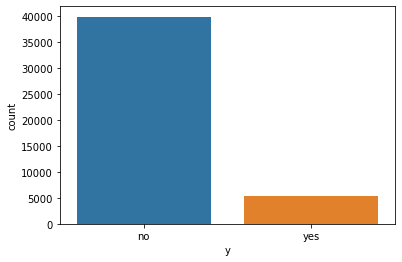

In [35]:
ax=sns.countplot(x="y", data=df)

We can see from the above plot that the dataset is imbalanced, where the number of negative class is close to 8 times the number of positive class.

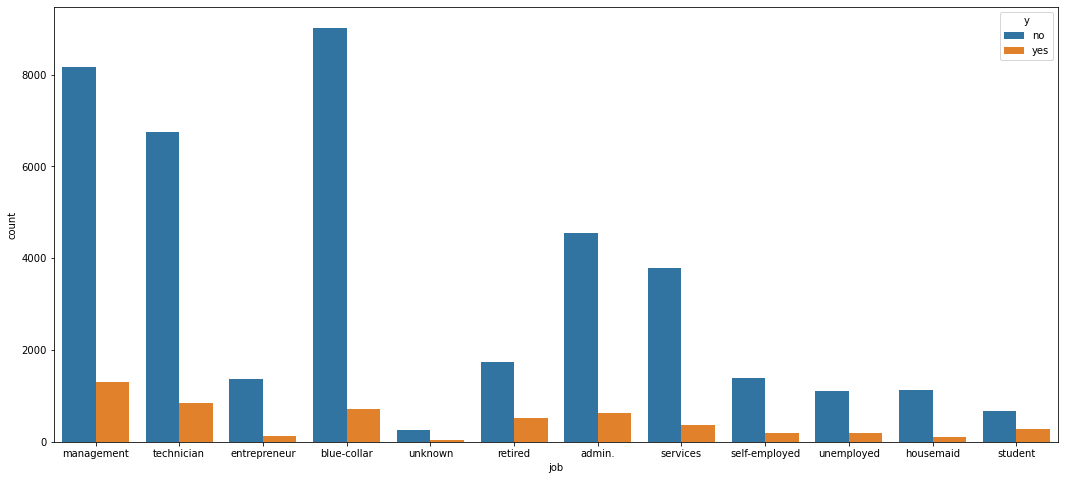

In [36]:
plt.figure(figsize=(18,8))
ax=sns.countplot(x='job', data=df, hue="y")

From the above plot, we can see that:

<li>The customers who have a job of **management** have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing.
<li>The customers who have a job of **technician** have the 2nd highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing.
<li>The customers who have a job of **blue-collar** have the 3rd highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing.



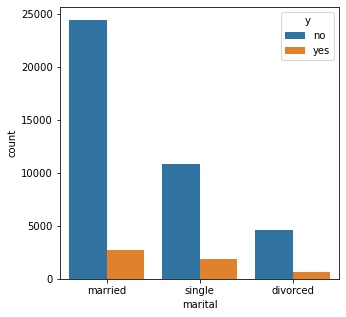

In [37]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='marital', data=df, hue="y")

Majority of the customers are unmarried. Followed by Single and divorced.

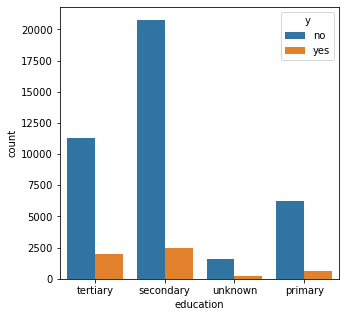

In [38]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='education', data=df, hue="y")

 Majority of the customers do not have a secondary or tertiary education. 

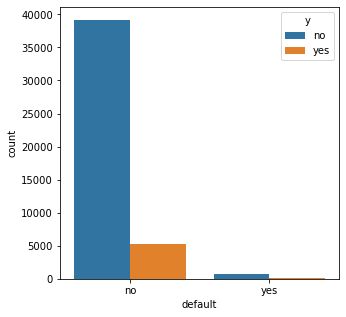

In [39]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='default', data=df, hue="y")

Mojority of the customers do not have a credit in default.

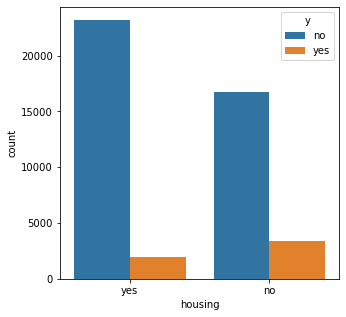

In [40]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='housing', data=df, hue="y")

A lot of people who have not subscibed to a term deposit have housing loan.

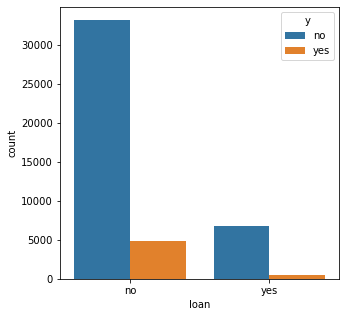

In [41]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='loan', data=df, hue="y")

As we can see from the above plot, majority of the customers who have not subscribed for the term deposit has a personal loan.

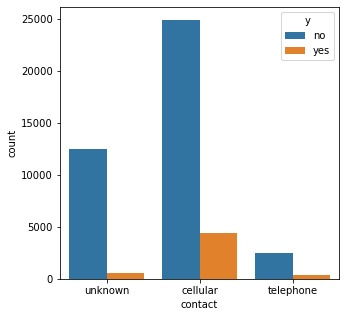

In [42]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='contact', data=df, hue="y")

The communication type for cellular concat has the most people subscribing for the term deposit. 

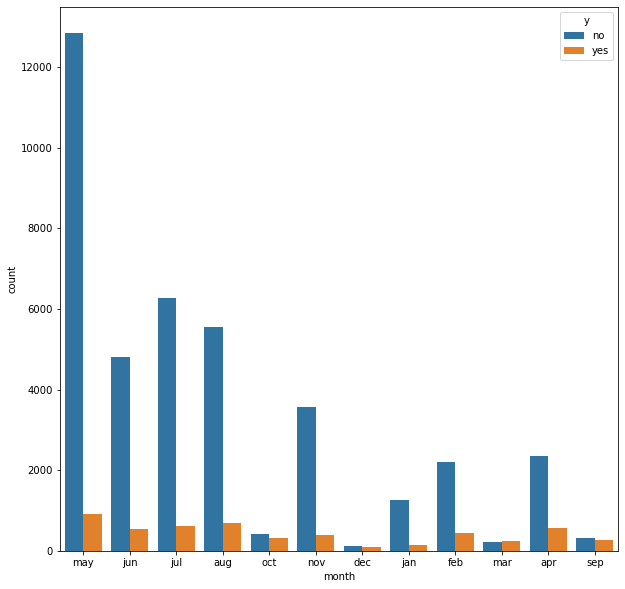

In [43]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x='month', data=df, hue="y")

It seems that the period between the periods of May to August majority of people have suscribed to the term deposit.

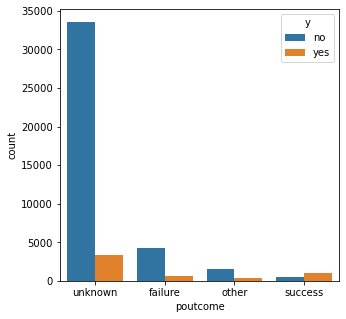

In [44]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='poutcome', data=df, hue="y")

For most of the customers, the previous marketing campaign outcome is unknown. It means that most of the customers are new customers who have not been contacted earlier. Also one thing to note here that, for the customers who had a successful outcome from the previous campaign, majority of those customers did subscribe for a term deposit. From this, we can make an assumption, that this feature may hold some value in predicting the target variable. specially poutcome_success category.

# Univariate analysis on Numerical features
We will look into the box plot and the distribution for all the numerical features.

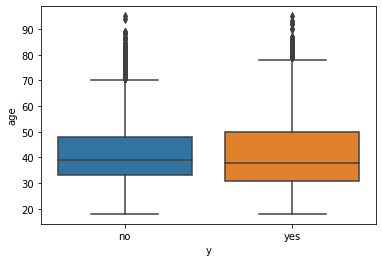

In [45]:
sns.boxplot(data=df, x='y',y='age')

From the above boxplot we know that for both the customers that subscibed or didn’t subscribe a term deposit, has a median age of around 38–40. And the boxplot for both the classes overlap quite a lot, which means that age isn’t necessarily a good indicator for which customer will subscribe and which customer will not.

In [46]:
numerical_attributes = df.select_dtypes(include=['int'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6D32A1580>,
      dtype=object)

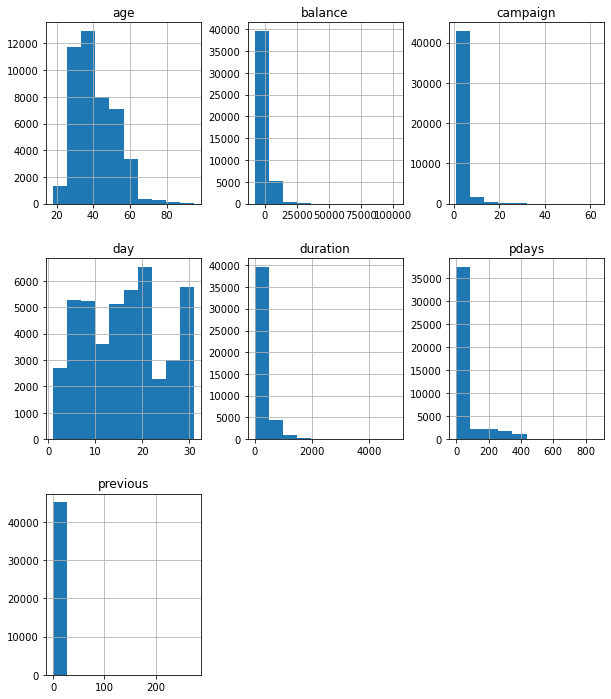

In [47]:
df.hist(figsize=(10,12))

In [48]:
# Assign outcome as 0 if income <=50K and as 1 if income >50K
df['y'] = [0 if x == 'no' else 1 for x in df['y']]


# Assign X as a DataFrame of features and y as a Series of the outcome variable
# axis : {0 or ‘index’, 1 or ‘columns’}, default 0
# Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).

X = df.drop('y', 1) # 1 represents column, we are dropping as we are doing classification
y = df.y

In [49]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

 So we observe that 5289 people opened term deposit account and 39922 have not opened the term deposit account

In [50]:
df.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [51]:
# Decide which categorical variables you want to use in model
for col_name in X.columns:
    
    if X[col_name].dtypes == 'object':  
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))
        print(X[col_name].value_counts())
        print()


Feature 'job' has 12 unique categories
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Feature 'marital' has 3 unique categories
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Feature 'education' has 4 unique categories
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Feature 'default' has 2 unique categories
no     44396
yes      815
Name: default, dtype: int64

Feature 'housing' has 2 unique categories
yes    25130
no     20081
Name: housing, dtype: int64

Feature 'loan' has 2 unique categories
no     37967
yes     7244
Name: loan, dtype: int64

Feature 'contact' has 3 unique categories
cellular     29285
unknown      13020
telephone     2906
Name: contac

In [52]:
cat_df = df.select_dtypes(include=['object']).copy()

In [53]:
cat_df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


In [54]:
print(cat_df.isnull().sum()) #checking null values column wise

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
dtype: int64


In [55]:
from sklearn.preprocessing import LabelEncoder

cat_df2 = cat_df.apply(LabelEncoder().fit_transform)  #label encoding multiple categorical columns

cat_df2.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,4,1,2,0,1,0,2,8,3
1,9,2,1,0,1,0,2,8,3
2,2,1,1,0,1,1,2,8,3
3,1,1,3,0,1,0,2,8,3
4,11,2,3,0,0,0,2,8,3


In [56]:
drop_df = df.drop(['job','marital','education','default','housing','loan','contact','month','poutcome'], axis=1)

In [57]:
 concat_df = pd.concat([cat_df2, drop_df], axis=1) #concating dummy variables

In [58]:
concat_df.head() 

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous,y
0,4,1,2,0,1,0,2,8,3,58,2143,5,261,1,-1,0,0
1,9,2,1,0,1,0,2,8,3,44,29,5,151,1,-1,0,0
2,2,1,1,0,1,1,2,8,3,33,2,5,76,1,-1,0,0
3,1,1,3,0,1,0,2,8,3,47,1506,5,92,1,-1,0,0
4,11,2,3,0,0,0,2,8,3,33,1,5,198,1,-1,0,0


Text(0.5, 1.05, 'Pearson correlation of Features')

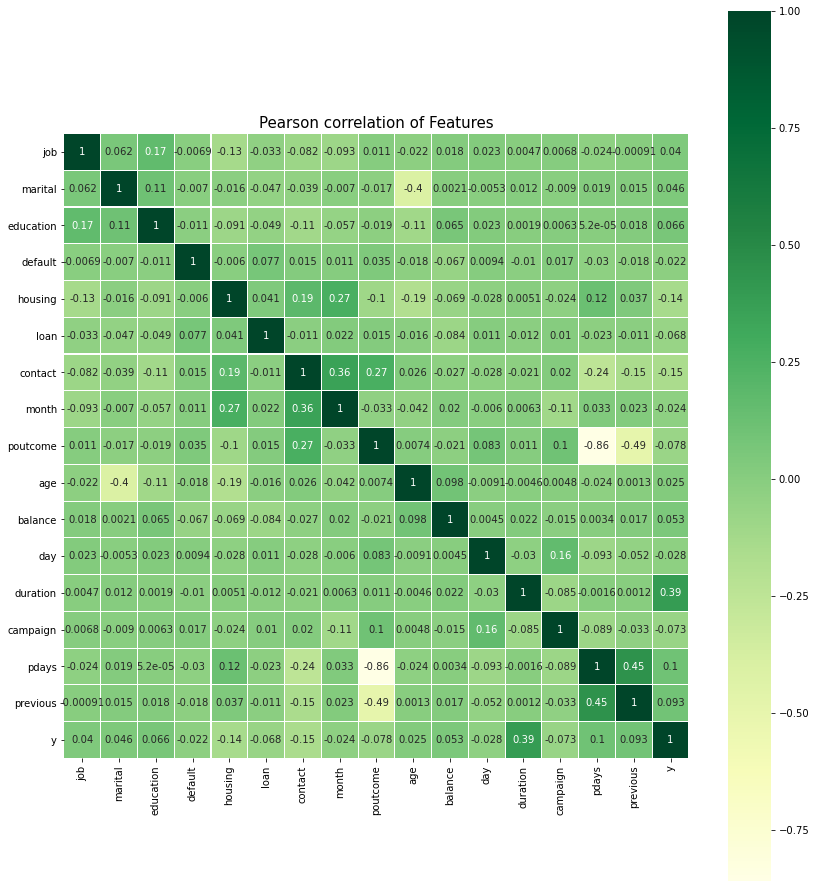

In [59]:
corr = concat_df.corr()

f, ax = plt.subplots(figsize=(14,16))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

We can observe that most of the variables do not have a strong correlation with y (output). None the less we will use all the variables in our models. Because most of the variables can predict the outcome (y) in some way or the other.

In [60]:
# Seperating Independent and class Variables

In [68]:
X = concat_df.iloc[:,:-1]
Y = concat_df.iloc[:, -1]

# Model 1: Logistic regression

In [69]:
from sklearn.linear_model import LogisticRegression

#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,y)   

C:\Users\Vish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [71]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': classifier.predict(X)})

In [72]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [73]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[39278   644]
 [ 4436   853]]


In [74]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [ ]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

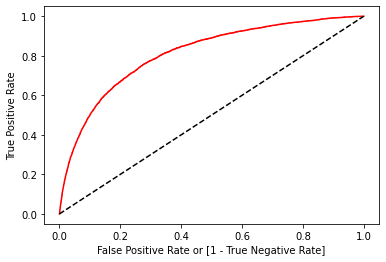

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [80]:
auc

0.5725733340346442

# Model 2: Logit Model

In [65]:
import statsmodels.api as sm   

In [76]:
logit = sm.Logit(Y, X)   

In [77]:
logit.fit().summary()  

Optimization terminated successfully.
         Current function value: 0.276364
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Tue, 27 Apr 2021   Pseudo R-squ.:                  0.2342
Time:                        18:32:25   Log-Likelihood:                -12495.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
job           -0.0157      0.005     -3.051      0.002      -0.026      -0.006
marital       -0.1877      0.026     -7.181      0.000      -0.239      -0.136
education      0.0308      0.022      1.389      0.165      -0.013       0.074
default       -0.4022      0.159     -2.534      0.011      -0.713      -0.091
housing       -1.2719      0.037    -34.810      0.000      -1.343      -1.200
loan          -0.8290      0.056    -14.696      0.000      -0.940      -0.718
contact       -0.5961      0.027    -22.449      0.000      -0.648      -0.544
month          0.0054      0.005      1.013      0.311      -0.005       0.016
poutcome      -0.2257      0.022    -10.244      0.000      -0.269      -0.183
age           -0.0235      0.001    -18.322      0.000      -0.026      -0.021
balance     1.978e-05   4.51e-06      4.381      0.000    1.09e-05    2.86e-05
day           -0.0169      0.002     -8.524      0.000      -0.021      -0.013
duration       0.0038   6.01e-05     63.105      0.000       0.004       0.004
campaign      -0.1682      0.011    -15.928      0.000      -0.189      -0.147
pdays          0.0002      0.000      0.878      0.380      -0.000       0.001
previous       0.0548      0.008      6.879      0.000       0.039       0.070
==============================================================================
"""

In [78]:
fpr 

array([0.00000000e+00, 2.50488452e-05, 1.00195381e-04, ...,
       9.97795702e-01, 9.97795702e-01, 1.00000000e+00])

In [79]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

# Model 3: With Sklearn

In [80]:
x_train, x_test, y_train, y_test = train_test_split(concat_df.iloc[:, :-1],
                                                    concat_df.iloc[:, -1],
                                                    test_size=0.25)

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

<IPython.core.display.Javascript object>

((33908, 16), (33908,), (11303, 16), (11303,))

In [82]:
# Apply multiple Linear Regression Model 

from sklearn.linear_model import LinearRegression
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 

# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 

Mean squared Error on test set :  0.08149079158488254
      Columns  Coefficient Estimate
0         job              0.001200
1     marital              0.020158
2   education              0.016330
3     default             -0.024778
4     housing             -0.083115
5        loan             -0.044628
6     contact             -0.040453
7       month              0.005409
8    poutcome              0.034399
9         age              0.001021
10    balance              0.000003
11        day             -0.000420
12   duration              0.000475
13   campaign             -0.003173
14      pdays              0.000431
15   previous              0.013462


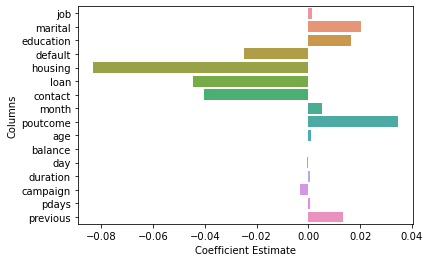

In [83]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

The coefficient estimate for housing 

# Model 4: Ridge Model

In [84]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

0.08149067949646215
      Columns  Coefficient Estimate
0         job              0.001200
1     marital              0.020158
2   education              0.016330
3     default             -0.024736
4     housing             -0.083105
5        loan             -0.044620
6     contact             -0.040452
7       month              0.005408
8    poutcome              0.034394
9         age              0.001021
10    balance              0.000003
11        day             -0.000420
12   duration              0.000475
13   campaign             -0.003173
14      pdays              0.000430
15   previous              0.013462


# Model 5: Lasso Model

In [85]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

Mean squared error on test set 0.08459260221858299
      Columns  Coefficient Estimate
0         job              0.000000
1     marital              0.000000
2   education              0.000000
3     default             -0.000000
4     housing             -0.000000
5        loan             -0.000000
6     contact             -0.000000
7       month             -0.000000
8    poutcome             -0.000000
9         age              0.000000
10    balance              0.000005
11        day             -0.000000
12   duration              0.000468
13   campaign             -0.000000
14      pdays              0.000238
15   previous              0.000000


# Model 6: Elastic Net

In [86]:
# import model 
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = .4,l1_ratio=.5) 
e_net.fit(x_train, y_train) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

Mean Squared Error on test set 0.0844571334267286


,Columns,Coefficient Estimate
0,job,0.000000
1,marital,0.000000
2,education,0.000000
3,default,-0.000000
4,housing,-0.000000
5,loan,-0.000000
6,contact,-0.000000
7,month,-0.000000
8,poutcome,0.000000
9,age,0.000000
